# 数据压缩

## ASC-II字符压缩

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

A = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
B = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
C = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
D = [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
E = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
F = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
G = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
H = [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
I = [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
J = [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

data = np.array([A, B, C, D, E, F, G, H, I, J])
loss_history = []

Iteration 0: Cost = 2.5065665554481744
Iteration 100: Cost = 1.9466737595638677
Iteration 200: Cost = 1.5013755660935342
Iteration 300: Cost = 1.330279137642835
Iteration 400: Cost = 1.2731535023448497
Iteration 500: Cost = 1.2490430478555758
Iteration 600: Cost = 1.2348626949087327
Iteration 700: Cost = 1.2229017742790662
Iteration 800: Cost = 1.2084350617438764
Iteration 900: Cost = 1.1855950612658153
Iteration 1000: Cost = 1.1445117684519395
Iteration 1100: Cost = 1.072978982522202
Iteration 1200: Cost = 0.9826020447922711
Iteration 1300: Cost = 0.897573823449275
Iteration 1400: Cost = 0.8208076808682535
Iteration 1500: Cost = 0.7454013943371486
Iteration 1600: Cost = 0.6697725246020759
Iteration 1700: Cost = 0.5987811787096927
Iteration 1800: Cost = 0.5370658818621061
Iteration 1900: Cost = 0.48522621854187675


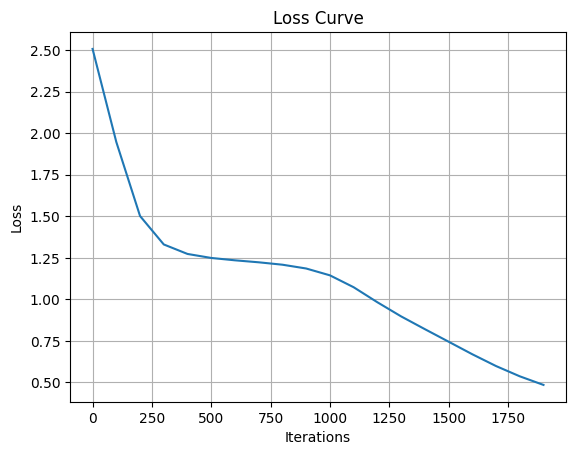

Predictions: 
 [[1.14860824e-01 2.14829962e-01 7.03599053e-01 6.91305184e-01
  4.01724945e-01 2.66366455e-01 9.15839233e-02 4.95773516e-02
  4.10930019e-01 1.63924675e-01 7.87869163e-01 6.54894280e-02
  4.07622381e-01 4.81907764e-02 4.29429815e-02 2.48053243e-01
  4.81907764e-02 9.10711553e-01 9.31373405e-02 4.50873580e-02
  4.81907764e-02 4.29429815e-02 2.30048675e-01 8.79136888e-01
  2.90899094e-01 9.05699859e-01 3.10190814e-02 4.81907764e-02
  4.29429815e-02 2.30048675e-01 5.99874603e-01 1.94740050e-01
  7.39386856e-01 3.55351277e-02 4.29429815e-02 8.75387793e-02
  5.94928171e-01 5.99874603e-01 8.48087840e-01 7.15703477e-01
  6.45900178e-01 4.81907764e-02 9.31373405e-02 6.18930323e-01
  4.81907764e-02 1.48261170e-01 2.83276252e-02 9.36656519e-01
  4.81907764e-02 6.26900849e-01 8.10947929e-01 7.03599053e-01
  2.45913931e-01 9.49983891e-01 9.45912494e-01 7.75641453e-01
  4.81907764e-02 4.81907764e-02 4.81907764e-02 4.81907764e-02
  4.81907764e-02 4.81907764e-02 4.81907764e-02]
 [9.427

In [5]:
# 自编码器类
class Autoencoder:
    def __init__(self, input_size, hidden_size, learning_rate=0.1, iterations=2000, disp_step=100):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.disp_step = disp_step
        self.parameters = self.initialize_parameters()

    def initialize_parameters(self):
        """初始化权重参数"""
        np.random.seed(1)
        W1 = np.random.randn(self.hidden_size, self.input_size) * 0.01
        b1 = np.zeros((self.hidden_size, 1))
        W2 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        b2 = np.zeros((self.input_size, 1))
        return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    def sigmoid(self, z):
        """Sigmoid 激活函数"""
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        """Sigmoid 导数"""
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward_propagate(self, X):
        """前向传播"""
        W1, b1 = self.parameters["W1"], self.parameters["b1"]
        W2, b2 = self.parameters["W2"], self.parameters["b2"]

        Z1 = np.dot(W1, X) + b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = self.sigmoid(Z2)

        cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
        return A2, cache

    def calculate_cost(self, A2, Y):
        """计算损失函数"""
        m = Y.shape[1]  # 样本数量
        cost = (1. / m) * np.sum(np.square(A2 - Y))
        return np.squeeze(cost)

    def backward_propagate(self, X, Y, cache):
        """反向传播"""
        m = X.shape[1]
        W2 = self.parameters["W2"]

        A1 = cache["A1"]
        A2 = cache["A2"]

        dZ2 = A2 - Y
        dW2 = (1. / m) * np.dot(dZ2, A1.T)
        db2 = (1. / m) * np.sum(dZ2, axis=1, keepdims=True)

        dZ1 = np.dot(W2.T, dZ2) * self.sigmoid_derivative(cache["Z1"])
        dW1 = (1. / m) * np.dot(dZ1, X.T)
        db1 = (1. / m) * np.sum(dZ1, axis=1, keepdims=True)

        grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
        return grads

    def update_parameters(self, grads):
        """参数更新"""
        self.parameters["W1"] -= self.learning_rate * grads["dW1"]
        self.parameters["b1"] -= self.learning_rate * grads["db1"]
        self.parameters["W2"] -= self.learning_rate * grads["dW2"]
        self.parameters["b2"] -= self.learning_rate * grads["db2"]

    def train(self, X, Y, print_cost=False):
        """训练函数"""
        cost_list = []
        for i in range(self.iterations):
            A2, cache = self.forward_propagate(X)
            cost = self.calculate_cost(A2, Y)
            grads = self.backward_propagate(X, Y, cache)
            self.update_parameters(grads)

            if print_cost and i % self.disp_step == 0:
                print(f"Iteration {i}: Cost = {cost}")
                cost_list.append(cost)

        return cost_list

    def predict(self, X):
        """预测函数"""
        A2, _ = self.forward_propagate(X)
        return A2

autoencoder = Autoencoder(input_size=data.shape[0], hidden_size=10, learning_rate=0.1, iterations=2000, disp_step=100)
cost_list = autoencoder.train(data, data, print_cost=True)

#------------------------------------------------------------
# 绘制损失曲线
def plot_loss(cost_list, num_iterations, disp_step):
    plt.plot(range(0, num_iterations, disp_step), cost_list)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

plot_loss(cost_list, autoencoder.iterations, autoencoder.disp_step)

# # 预测并展示结果
# X_test = data  # 测试集，这里使用与训练集相同的数据
# predictions = autoencoder.predict(X_test)
# print("Predictions: \n", predictions)

### 图像压缩


Training with 16 hidden units...
MSE for 16 hidden units: 0.1064

Training with 32 hidden units...
MSE for 32 hidden units: 0.1352

Training with 64 hidden units...
MSE for 64 hidden units: 0.1449

Training with 128 hidden units...
MSE for 128 hidden units: 1.1432

Training with 256 hidden units...
MSE for 256 hidden units: 4.7453


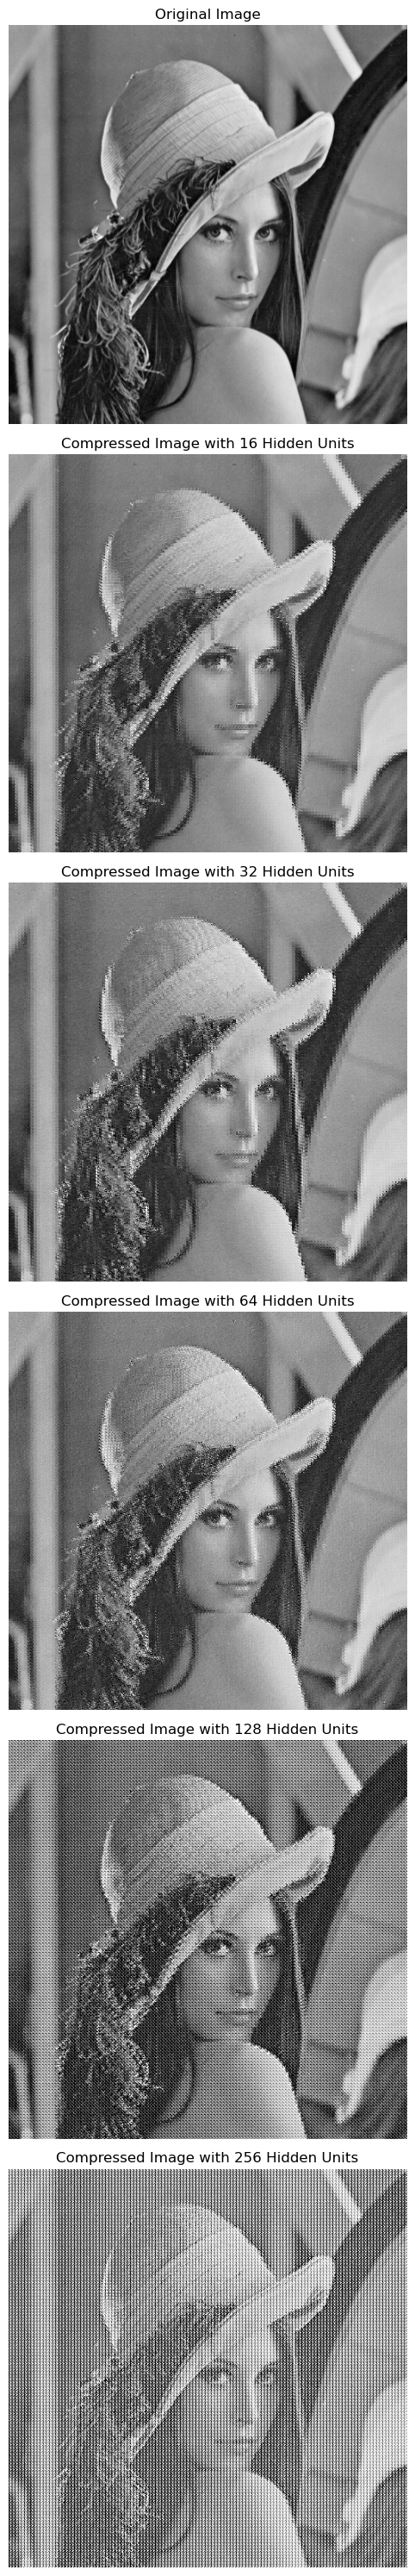

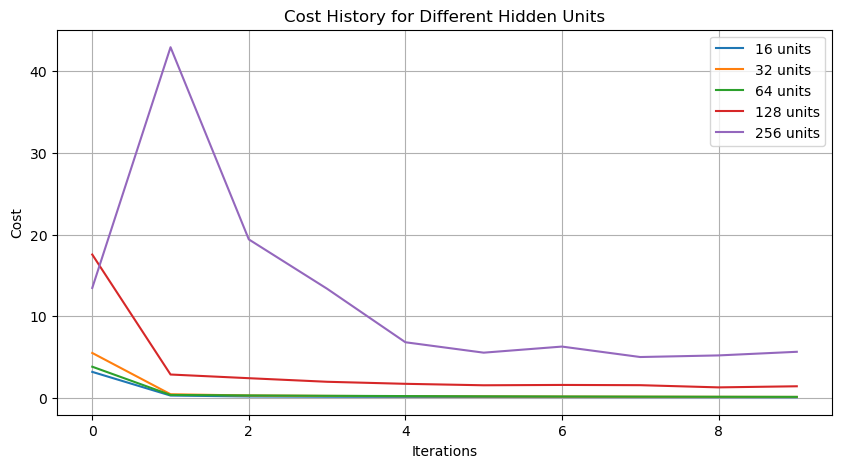

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

np.random.seed(int(time.time()))

# Shuffle data function
def shuffle_data(X, Y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], Y[indices]

# Initialize parameters
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.5
    W2 = np.random.randn(n_y, n_h) * 0.5
    b1 = np.zeros((n_h, 1))
    b2 = np.zeros((n_y, 1))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

# Forward propagation
def forward_propagate(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X.T) + b1
    A1 = (1 - np.exp(-Z1)) / (1 + np.exp(-Z1))

    Z2 = np.dot(W2, A1) + b2
    A2 = Z2

    return A2, {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

# Calculate cost
def calculate_cost(A2, Y):
    error = A2.T - Y.T
    cost = np.mean(np.sum(error**2, axis=1))
    return cost

# Backward propagation
def backward_propagate(parameters, cache, X, Y):
    m = X.shape[0]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = (A2 - Y)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  # 使用 A1 的导数
    dW1 = np.dot(dZ1, X) / m
    db1 = sum(dZ1, axis=1, keepdims=True) / m

    # 梯度剪切
    for grad in [dW1, db1, dW2, db2]:
        np.clip(grad, -1, 1, out=grad)

    grads = {'dW1':dW1,
             'db1':db1,
             'dW2':dW2,
             'db2':db2}

    return grads


# Update parameters
def update_parameters(parameters, grads, learning_rate):
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']
    return parameters

# Image processing functions
def lena_to_blocks(blocksize, image_file):
    img = Image.open(image_file).convert('RGB')
    imgdata = np.array(img)[:, :, 0].astype(np.float32)
    imgdata = (imgdata - 128) / 256
    outdata = []

    for i in range(0, imgdata.shape[0], blocksize):
        for j in range(0, imgdata.shape[1], blocksize):
            blockdata = imgdata[i:i+blocksize, j:j+blocksize].reshape(1, -1)
            outdata.append(blockdata)

    return np.vstack(outdata)

def blocks_to_lena(blockdata):
    blocknum = blockdata.shape[0]
    blocklen = blockdata.shape[1]
    block_size = int(np.sqrt(blocklen))
    image_block_size = int(np.sqrt(blocknum))

    block_line = []
    for i in range(image_block_size):
        block_row = np.hstack([blockdata[i*image_block_size + j].reshape(block_size, block_size) 
                                for j in range(image_block_size)])
        block_line.append(block_row)

    imagedata = np.vstack(block_line)
    imagedata = (imagedata * 256 + 128)
    imagedata = np.clip(imagedata, 0, 255)
    return imagedata.astype(np.uint8)

# Training function
def train(X, Y, num_iterations, learning_rate, print_cost=False, hidden_units=10):
    n_x = X.shape[1]
    n_y = n_x
    n_h = hidden_units

    parameters = initialize_parameters(n_x, n_h, n_y)
    cost_history = []

    for i in range(num_iterations):
        A2, cache = forward_propagate(X, parameters)
        cost = calculate_cost(A2, Y)
        grads = backward_propagate(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 10 == 0:
            # print(f'Cost after iteration {i}: {cost}')
            cost_history.append(cost)

    return parameters, cost_history

def display_images(original_image, compressed_images, hidden_units_options):
    # 创建子图
    n = len(compressed_images) + 1  # 包括原始图像
    plt.figure(figsize=(15, 5 * n))

    # 显示原始图像
    plt.subplot(n, 1, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # 显示压缩后的图像
    for i, (compressed_image, hidden_units) in enumerate(zip(compressed_images, hidden_units_options), start=2):
        plt.subplot(n, 1, i)
        plt.imshow(compressed_image, cmap='gray')
        plt.title(f"Compressed Image with {hidden_units} Hidden Units")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    lena_gray = 'lena_gray.gif'
    BLOCK_SIZE = 4
    hidden_units_options = [16, 32, 64, 128, 256]  # 选择的隐层节点数目

    x_train = lena_to_blocks(BLOCK_SIZE, lena_gray)
    y_train = x_train.T
    original_image = Image.open(lena_gray).convert('L')  # 读取原始图像并转换为灰度

    compressed_images = []
    all_cost_history = []

    for hidden_units in hidden_units_options:
        print(f"\nTraining with {hidden_units} hidden units...")
        parameters, cost_history = train(x_train, y_train, num_iterations=100, learning_rate=0.1, print_cost=True, hidden_units=hidden_units)

        A2, _ = forward_propagate(x_train, parameters)
        imagedata = blocks_to_lena(A2.T)
        compressed_images.append(imagedata)  # 保存压缩后的图像
        all_cost_history.append(cost_history)  # 保存成本历史

        # 计算MSE
        mse = calculate_cost(A2, y_train)
        print(f"MSE for {hidden_units} hidden units: {mse:.4f}")

    # 调用显示函数
    display_images(original_image, compressed_images, hidden_units_options)

    # 绘制成本曲线
    plt.figure(figsize=(10, 5))
    for cost_history, hidden_units in zip(all_cost_history, hidden_units_options):
        plt.plot(range(len(cost_history)), cost_history, label=f'{hidden_units} units')

    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid(True)
    plt.title("Cost History for Different Hidden Units")
    plt.show()
